드라이브 연동

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LambdaCallback, TensorBoard
from sklearn.preprocessing import LabelBinarizer
from tensorflow.nn import local_response_normalization  # lrn
import matplotlib.pyplot as plt
import io
import pandas as pd
from PIL import Image
import numpy as np
from numpy import asarray
import cv2
import glob

### 데이터 수집

데이터 부풀리기

In [ ]:
import numpy as np
import os

# 랜덤시드 고정시키기
np.random.seed(5)
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# 데이터셋 불러오기
train_datagen = ImageDataGenerator(rescale=1./255)
data_aug_gen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=15,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.5,
                                  zoom_range=[0.8, 2.0],
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')
path = '/content/drive/Shareddrives/예자/Garbage classification/paper/'
file_list = os.listdir(path)
for i in file_list:
    img = load_img('/content/drive/Shareddrives/yeja/Garbage classification/paper/%s'%i)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    count = 0
# 이 for는 무한으로 반복되기 때문에 우리가 원하는 반복횟수를 지정하여, 지정된 반복횟수가 되면 빠져나오도록 해야합니다.
    for batch in data_aug_gen.flow(x, batch_size=1, save_to_dir='/content/drive/Shareddrives/예자/Garbage classification/paper_copy/', save_prefix='tri', save_format='jpg'):
        count += 1
        if count > 15:
            break

In [ ]:
import numpy as np
import os

# 랜덤시드 고정시키기
np.random.seed(5)
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# 데이터셋 불러오기
train_datagen = ImageDataGenerator(rescale=1./255)
data_aug_gen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=15,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.5,
                                  zoom_range=[0.8, 2.0],
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')
path = '/content/drive/Shareddrives/예자/Garbage classification/trash/'
file_list = os.listdir(path)
for i in file_list:
    img = load_img('/content/drive/Shareddrives/yeja/Garbage classification/trash/%s'%i)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    count = 0
# 이 for는 무한으로 반복되기 때문에 우리가 원하는 반복횟수를 지정하여, 지정된 반복횟수가 되면 빠져나오도록 해야합니다.
    for batch in data_aug_gen.flow(x, batch_size=1, save_to_dir='/content/drive/Shareddrives/예자/Garbage classification/trash_copy/', save_prefix='tri', save_format='jpg'):
        count += 1
        if count > 14:
            break
print("complete")

In [ ]:
# cardboard_copy = 4727
# glass_copy = 5464
# metal_copy = 4792
# paper_copy = 6078
# plastic_copy = 5334
# trash_copy = 1962
from imutils import paths

search_dir = "/content/drive/Shareddrives/yeja/Garbage classification/cardboard_copy"

image_paths = sorted(
    list(paths.list_images(search_dir))
)

print(">>> image count =", len(image_paths))
print(image_paths)

데이터 배열안에 넣기

In [ ]:
import os
import cv2
from tqdm import tqdm
from imutils import paths

search_dir = "/content/drive/Shareddrives/yeja/Garbage classification/cardboard_copy"

image_paths = sorted(
    list(paths.list_images(search_dir))
)
image_dim = (150, 150, 3)
labels = []
images = []
for image_path in tqdm(image_paths):
    image = cv2.imread(image_path)

    image = cv2.resize(
        image, (image_dim[1], image_dim[0])
    )
    images.append(image)
    
    label = "cardboard"
    labels.append([label])
    
print(">>> images count =", len(images))

search_dir = "/content/drive/Shareddrives/yeja/Garbage classification/glass_copy"

image_paths = sorted(
    list(paths.list_images(search_dir))
)

for image_path in tqdm(image_paths):
    image = cv2.imread(image_path)

    image = cv2.resize(
        image, (image_dim[1], image_dim[0])
    )
    images.append(image)
    
    label = "glass"
    labels.append([label])
    
print(">>> images count =", len(images))

search_dir = "/content/drive/Shareddrives/yeja/Garbage classification/metal_copy"

image_paths = sorted(
    list(paths.list_images(search_dir))
)

for image_path in tqdm(image_paths):
    image = cv2.imread(image_path)

    image = cv2.resize(
        image, (image_dim[1], image_dim[0])
    )
    images.append(image)
    
    label = "metal"
    labels.append([label])
    
print(">>> images count =", len(images))

search_dir = "/content/drive/Shareddrives/yeja/Garbage classification/plastic_copy"

image_paths = sorted(
    list(paths.list_images(search_dir))
)

for image_path in tqdm(image_paths):
    image = cv2.imread(image_path)

    image = cv2.resize(
        image, (image_dim[1], image_dim[0])
    )
    images.append(image)
    
    label = "plastic"
    labels.append([label])
    
print(">>> images count =", len(images))

search_dir = "/content/drive/Shareddrives/yeja/Garbage classification/paper_copy"

image_paths = sorted(
    list(paths.list_images(search_dir))
)

for image_path in tqdm(image_paths):
    image = cv2.imread(image_path)

    image = cv2.resize(
        image, (image_dim[1], image_dim[0])
    )
    images.append(image)
    
    label = "paper"
    labels.append([label])
    
print(">>> images count =", len(images))

search_dir = "/content/drive/Shareddrives/yeja/Garbage classification/trash_copy"

image_paths = sorted(
    list(paths.list_images(search_dir))
)

for image_path in tqdm(image_paths):
    image = cv2.imread(image_path)

    image = cv2.resize(
        image, (image_dim[1], image_dim[0])
    )
    images.append(image)
    
    label = "trash"
    labels.append([label])
    
print(">>> images count =", len(images))

100%|██████████| 4727/4727 [01:25<00:00, 54.97it/s] 


>>> images count = 4727


100%|██████████| 5464/5464 [01:36<00:00, 56.63it/s] 


>>> images count = 10191


100%|██████████| 4792/4792 [01:22<00:00, 58.16it/s] 


>>> images count = 14983


100%|██████████| 5334/5334 [01:43<00:00, 51.40it/s] 


>>> images count = 20317


100%|██████████| 6078/6078 [01:57<00:00, 51.89it/s] 


>>> images count = 26395


100%|██████████| 6417/6417 [01:41<00:00, 63.25it/s] 

>>> images count = 32812


In [ ]:
from imutils import paths

search_dir = "/content/drive/Shareddrives/yeja/Garbage classification/glass_copy"

image_paths = sorted(
    list(paths.list_images(search_dir))
)

print(">>> image count =", len(image_paths))

>>> image count = 5464


### 데이터 전처리

스케일링 및 원핫 인코딩

In [ ]:
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer

images = np.array(images, dtype='float32')/255.0
labels = np.array(labels)

mlb = MultiLabelBinarizer()
enc_labels = mlb.fit_transform(labels)

print(">>> classes name =", mlb.classes_)

>>> classes name = ['cardboard' 'glass' 'metal' 'paper' 'plastic' 'trash']


In [ ]:
x_train = images
y_train = enc_labels

테스트, validation 데이터 배열에 담기

In [10]:
import os
import cv2
from tqdm import tqdm
from imutils import paths

search_dir = "/content/drive/Shareddrives/yeja/Garbage classification/cardboard"

image_dim = (150, 150, 3)

image_paths = sorted(
    list(paths.list_images(search_dir))
)
test_labels = []
test_images = []
for image_path in tqdm(image_paths):
    test_image = cv2.imread(image_path)

    test_image = cv2.resize(
        test_image, (image_dim[1], image_dim[0])
    )
    test_images.append(test_image)
    
    test_label = "cardboard"
    test_labels.append([test_label])
    
print(">>> images count =", len(test_images))
search_dir = "/content/drive/Shareddrives/yeja/Garbage classification/glass"

image_paths = sorted(
    list(paths.list_images(search_dir))
)
for image_path in tqdm(image_paths):
    test_image = cv2.imread(image_path)

    test_image = cv2.resize(
        test_image, (image_dim[1], image_dim[0])
    )
    test_images.append(test_image)
    
    test_label = "glass"
    test_labels.append([test_label])
    
print(">>> images count =", len(test_images))
search_dir = "/content/drive/Shareddrives/yeja/Garbage classification/metal"

image_paths = sorted(
    list(paths.list_images(search_dir))
)
for image_path in tqdm(image_paths):
    test_image = cv2.imread(image_path)

    test_image = cv2.resize(
        test_image, (image_dim[1], image_dim[0])
    )
    test_images.append(test_image)
    
    test_label = "metal"
    test_labels.append([test_label])
    
print(">>> images count =", len(test_images))
search_dir = "/content/drive/Shareddrives/yeja/Garbage classification/paper"

image_paths = sorted(
    list(paths.list_images(search_dir))
)
for image_path in tqdm(image_paths):
    test_image = cv2.imread(image_path)

    test_image = cv2.resize(
        test_image, (image_dim[1], image_dim[0])
    )
    test_images.append(test_image)
    
    test_label = "paper"
    test_labels.append([test_label])
    
print(">>> images count =", len(test_images))
search_dir = "/content/drive/Shareddrives/yeja/Garbage classification/plastic"

image_paths = sorted(
    list(paths.list_images(search_dir))
)
for image_path in tqdm(image_paths):
    test_image = cv2.imread(image_path)

    test_image = cv2.resize(
        test_image, (image_dim[1], image_dim[0])
    )
    test_images.append(test_image)
    
    test_label = "plastic"
    test_labels.append([test_label])
    
print(">>> images count =", len(test_images))
search_dir = "/content/drive/Shareddrives/yeja/Garbage classification/trash"

image_paths = sorted(
    list(paths.list_images(search_dir))
)
for image_path in tqdm(image_paths):
    test_image = cv2.imread(image_path)

    test_image = cv2.resize(
        test_image, (image_dim[1], image_dim[0])
    )
    test_images.append(test_image)
    
    test_label = "trash"
    test_labels.append([test_label])
    
print(">>> images count =", len(test_images))
print(len(test_labels))

100%|██████████| 403/403 [00:05<00:00, 75.98it/s] 


>>> images count = 403


100%|██████████| 501/501 [00:06<00:00, 77.10it/s] 


>>> images count = 904


100%|██████████| 410/410 [00:05<00:00, 73.15it/s] 


>>> images count = 1314


100%|██████████| 594/594 [00:08<00:00, 69.63it/s] 


>>> images count = 1908


100%|██████████| 482/482 [00:06<00:00, 74.43it/s] 


>>> images count = 2390


100%|██████████| 697/697 [00:08<00:00, 80.74it/s] 

>>> images count = 3087
3087


데이터 배열로 전환 및 test:validation = 5:5로 분할

In [11]:
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

test_images = np.array(test_images, dtype='float32')/255.0
test_labels = np.array(test_labels)

mlb = MultiLabelBinarizer()
test_enc_labels = mlb.fit_transform(test_labels)

print(">>> classes name =", mlb.classes_)

seed = 23

(x_test, x_val, y_test, y_val) = train_test_split(
    test_images, test_enc_labels, test_size=0.5, random_state=seed
)
print(">> test test shape = {} {}".format(
    x_test.shape, y_test.shape)
)

>>> classes name = ['cardboard' 'glass' 'metal' 'paper' 'plastic' 'trash']
>> test test shape = (1543, 150, 150, 3) (1543, 6)


### 모델 구성 및 학습 과정 설정

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense

class Classifier:
	def build(width, height, depth, classes):
		model = Sequential()
		input_shape = (height, width, depth)
		
		model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
		model.add(Activation('relu'))
		model.add(BatchNormalization(axis=-1))
		model.add(MaxPooling2D(pool_size=(3, 3)))
		model.add(Dropout(0.25))
  
		model.add(Conv2D(64, (3, 3), padding='same'))
		model.add(Activation('relu'))
		model.add(BatchNormalization(axis=-1))
		model.add(Conv2D(64, (3, 3), padding='same'))
		model.add(Activation('relu'))
		model.add(BatchNormalization(axis=-1))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))
 
		model.add(Conv2D(128, (3, 3), padding='same'))
		model.add(Activation('relu'))
		model.add(BatchNormalization(axis=-1))
		model.add(Conv2D(128, (3, 3), padding='same'))
		model.add(Activation('relu'))
		model.add(BatchNormalization(axis=-1))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))
        
		model.add(Conv2D(256, (3, 3), padding='same'))
		model.add(Activation('relu'))
		model.add(BatchNormalization(axis=-1))
		model.add(Conv2D(256, (3, 3), padding='same'))
		model.add(Activation('relu'))
		model.add(BatchNormalization(axis=-1))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

		model.add(Flatten())
		model.add(Dense(2048))
		model.add(Activation('relu'))
		model.add(BatchNormalization())
		model.add(Dropout(0.5))
  
		model.add(Dense(classes))
		model.add(Activation('softmax'))
		return model
        
model = Classifier.build(
    width=image_dim[1], height=image_dim[0], depth=image_dim[2],
    classes=len(mlb.classes_)
)

In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

batch_size = 16
epoch = 200
learning_rate = 1e-3
decay = learning_rate / epoch

optimizer = Adam(
    learning_rate=learning_rate,
    decay=decay
)

loss = CategoricalCrossentropy(from_logits=False)

model.compile(
    loss=loss,
    optimizer=optimizer,
	metrics=['accuracy']
)

### 모델 학습

In [ ]:
hist = model.fit(x_train, y_train, epochs=200, batch_size=16, validation_data=(x_val, y_val))

print(hist.history['loss'])
print(hist.history['accuracy'])
print(hist.history['val_loss'])
print(hist.history['val_accuracy'])

Epoch 1/200
2051/2051 [==============================] - 44s 17ms/step - loss: 1.2149 - accuracy: 0.6028 - val_loss: 1.7642 - val_accuracy: 0.5259
Epoch 2/200
2051/2051 [==============================] - 34s 16ms/step - loss: 0.8365 - accuracy: 0.7162 - val_loss: 1.1031 - val_accuracy: 0.6956
Epoch 3/200
2051/2051 [==============================] - 34s 16ms/step - loss: 0.7703 - accuracy: 0.7398 - val_loss: 1.5158 - val_accuracy: 0.5978
Epoch 4/200
2051/2051 [==============================] - 34s 16ms/step - loss: 0.6632 - accuracy: 0.7795 - val_loss: 0.6287 - val_accuracy: 0.8089
Epoch 5/200
2051/2051 [==============================] - 34s 16ms/step - loss: 0.6171 - accuracy: 0.7921 - val_loss: 0.8824 - val_accuracy: 0.7377
Epoch 6/200
2051/2051 [==============================] - 34s 16ms/step - loss: 0.5298 - accuracy: 0.8170 - val_loss: 0.7022 - val_accuracy: 0.7701
Epoch 7/200
2051/2051 [==============================] - 34s 16ms/step - loss: 0.5191 - accuracy: 0.8229 - val_loss: 0

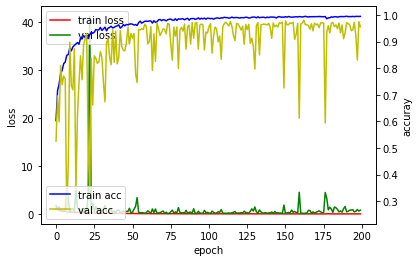

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'y', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

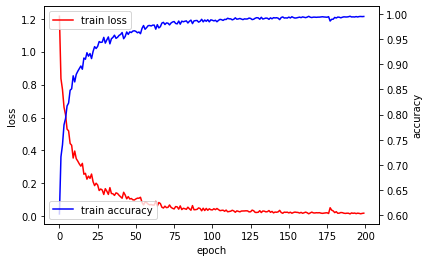

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'r', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')

# val_ax.plot(hist.history['val_loss'], 'r', label='val loss')
# val_ax.plot(hist.history['val_accuracy'], 'b', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

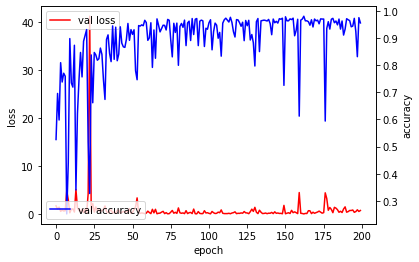

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, val_loss_ax = plt.subplots()
val_acc_ax = val_loss_ax.twinx()


val_loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
val_acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')

val_loss_ax.set_xlabel('epoch')
val_loss_ax.set_ylabel('loss')
val_acc_ax.set_ylabel('accuracy')

val_loss_ax.legend(loc='upper left')
val_acc_ax.legend(loc='lower left')

plt.show()

모델 테스트

In [ ]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=16)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

97/97 [==============================] - 1s 8ms/step - loss: 0.4051 - accuracy: 0.9624

loss_and_metrics : [0.40509337186813354, 0.9624108672142029]


모델 저장

In [ ]:
from keras.models import load_model
model.save('/content/drive/Shareddrives/yeja/Garbage classification/garbage_classification_model.h5')

In [ ]:
pip install graphviz

In [ ]:
pip install pydot

모델 아키텍쳐

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 activation (Activation)     (None, 150, 150, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 50, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        1

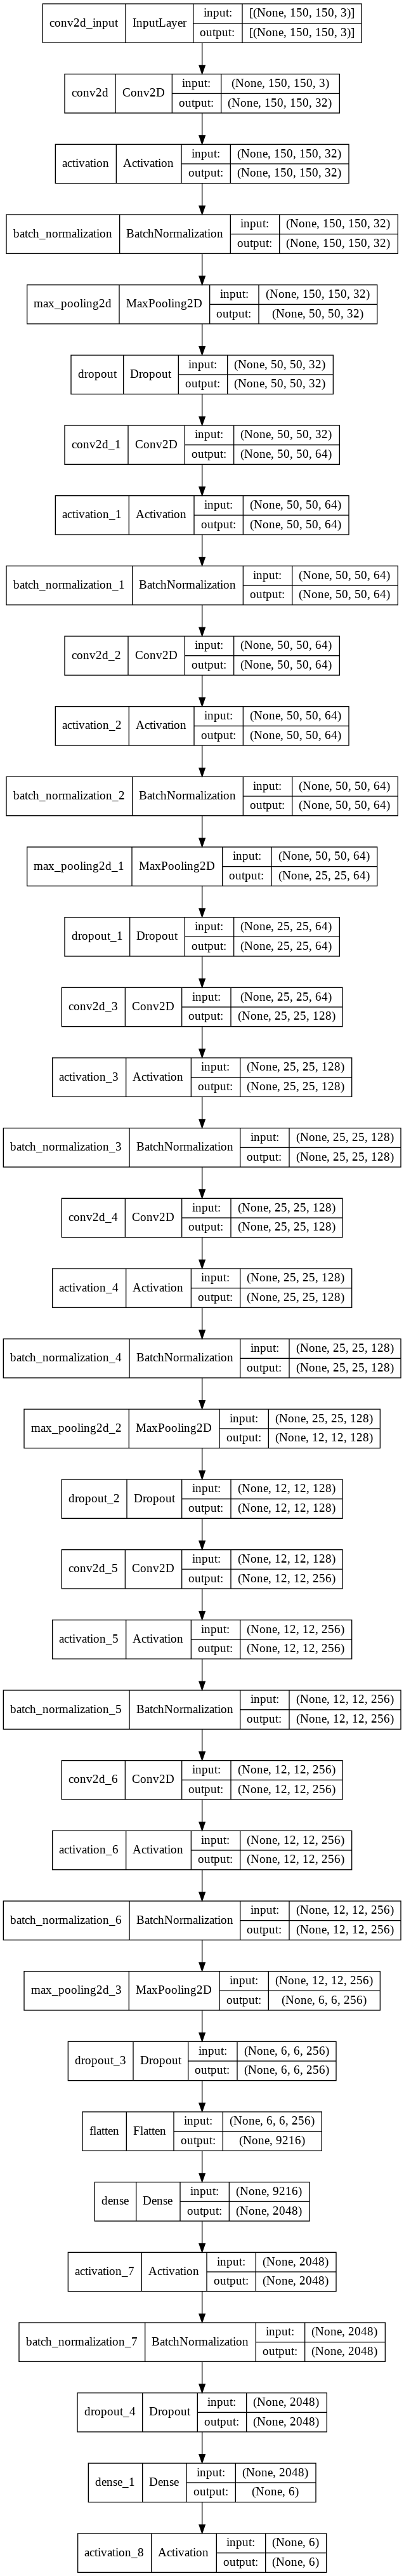

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='/content/drive/Shareddrives/yeja/Garbage classification/model_architecture.png')
plot_model(model, to_file='/content/drive/Shareddrives/yeja/Garbage classification/model_shapes.png', show_shapes=True)

### 모델 불러오기

In [2]:
from keras.models import load_model
model = load_model('/content/drive/Shareddrives/yeja/Garbage classification/garbage_classification_model.h5')

In [14]:
predictions = model.predict(x_test, verbose=1)

49/49 [==============================] - 9s 9ms/step


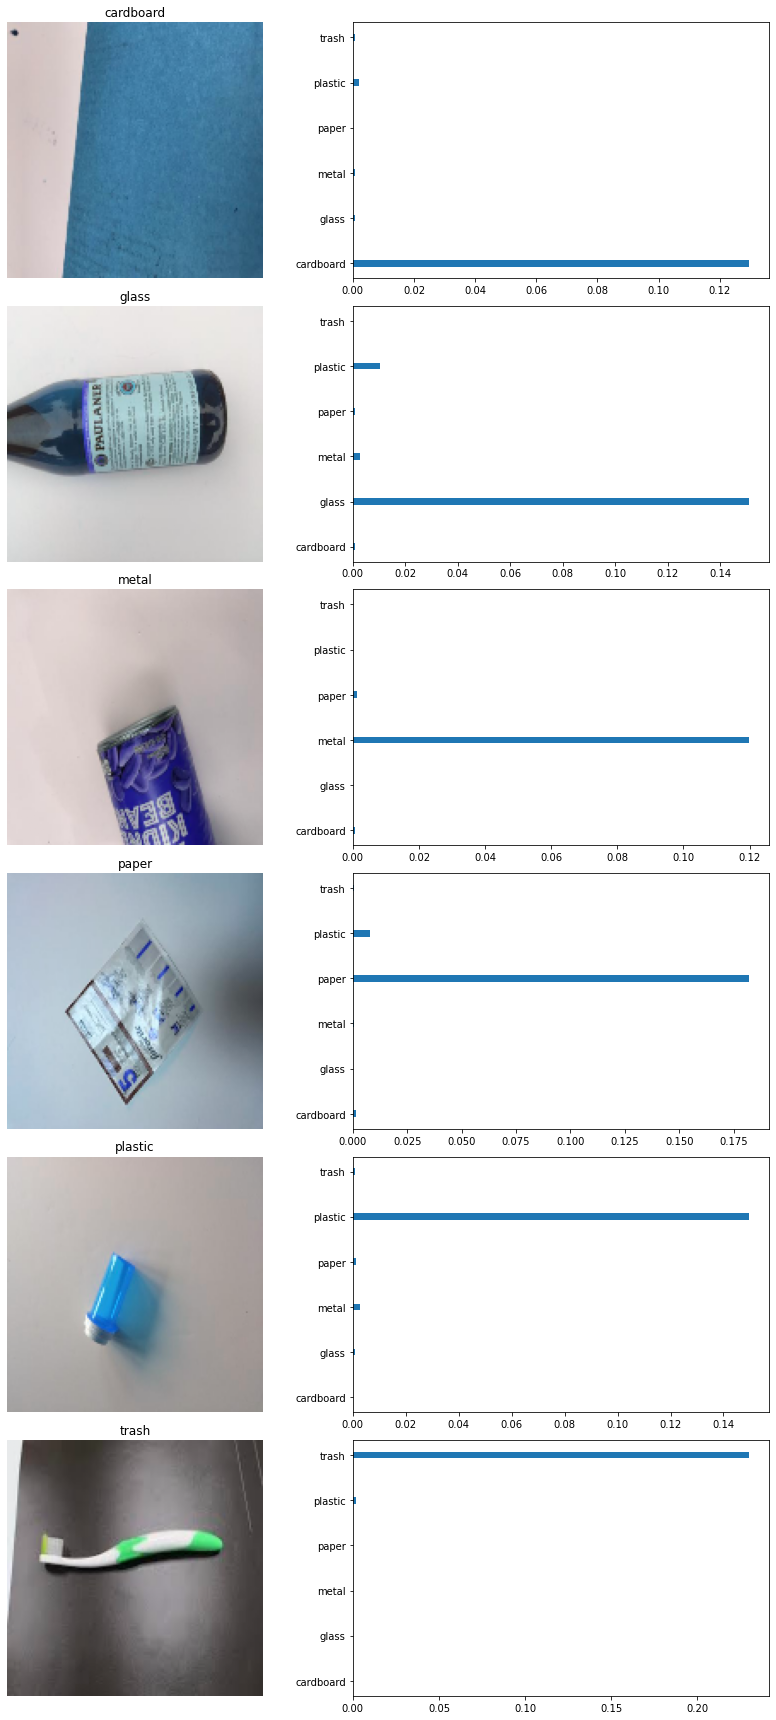

In [15]:
# 데이터 테스트
def load_label_names():
    return ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

def display_image_predictions(features, labels, predictions):
    n_classes = 6
    label_names = load_label_names()
    label_binarizer = LabelBinarizer()
    label_binarizer.fit(range(n_classes))
    label_ids = label_binarizer.inverse_transform(np.array(labels))

    fig, axs = plt.subplots(6, 2, figsize=(12,24))
    margin = 0.05
    ind = np.arange(n_classes)
    width = (1. - 2. * margin) / n_classes    
    arr_features = [None]*10
    arr_predictions = np.zeros((6, 6))
    last_image_i = 0
    
    for i, prediction in enumerate(predictions):
        label_id = label_ids[i]
        feature = features[i]
        arr_features[label_id] = feature
        max_id = np.argmax(prediction)
        arr_predictions[label_id][max_id] += 1
        last_image_i = i

    arr_predictions /= last_image_i
    
    for i in range(6):
      feature = arr_features[i]
      pred_name = label_names[i]
      prediction = arr_predictions[i]
      axs[i][0].imshow(feature)
      axs[i][0].set_title(pred_name)
      axs[i][0].set_axis_off()

      axs[i][1].barh(ind + margin, prediction, width)
      axs[i][1].set_yticks(ind + margin)
      axs[i][1].set_yticklabels(label_names)

    plt.tight_layout()

display_image_predictions(x_test, y_test, predictions)